**Name:** Raghul S\
**Reg.No:** 20BCE0915\
**Campus:** VIT Vellore\
**Email:** raghul.s2020@vitstudent.ac.in

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the dataset into the tool.

In [18]:
data = pd.read_csv('Housing.csv')

In [19]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


## 3.1 Univariate Analysis

### Histogram

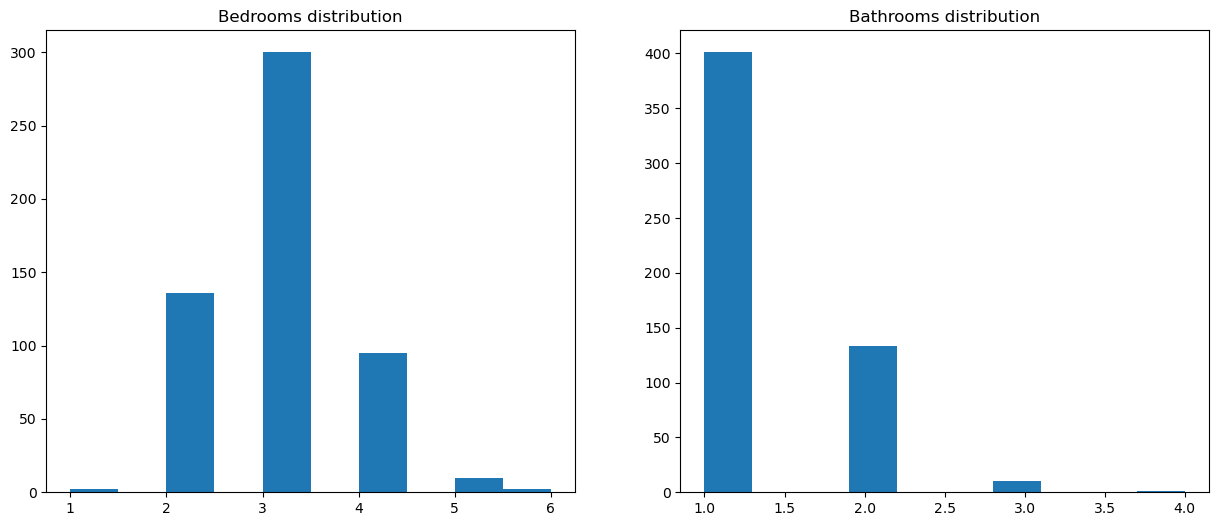

In [34]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.hist(data['bedrooms'])
plt.title('Bedrooms distribution')

plt.subplot(1, 2, 2)
plt.hist(data['bathrooms'])
plt.title('Bathrooms distribution')

plt.show()

### Pie chart

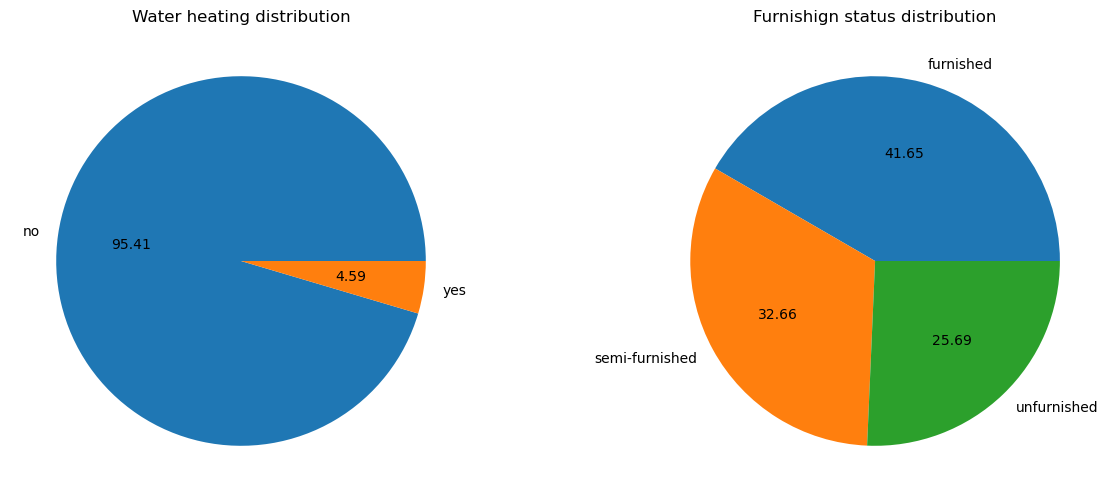

In [35]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.pie(data['hotwaterheating'].value_counts(),autopct='%.2f', labels = data['hotwaterheating'].unique())
plt.title('Water heating distribution')

plt.subplot(1, 2, 2)
plt.pie(data['furnishingstatus'].value_counts(),autopct='%.2f', labels = data['furnishingstatus'].unique())
plt.title('Furnishign status distribution')

plt.show()

### Box plot

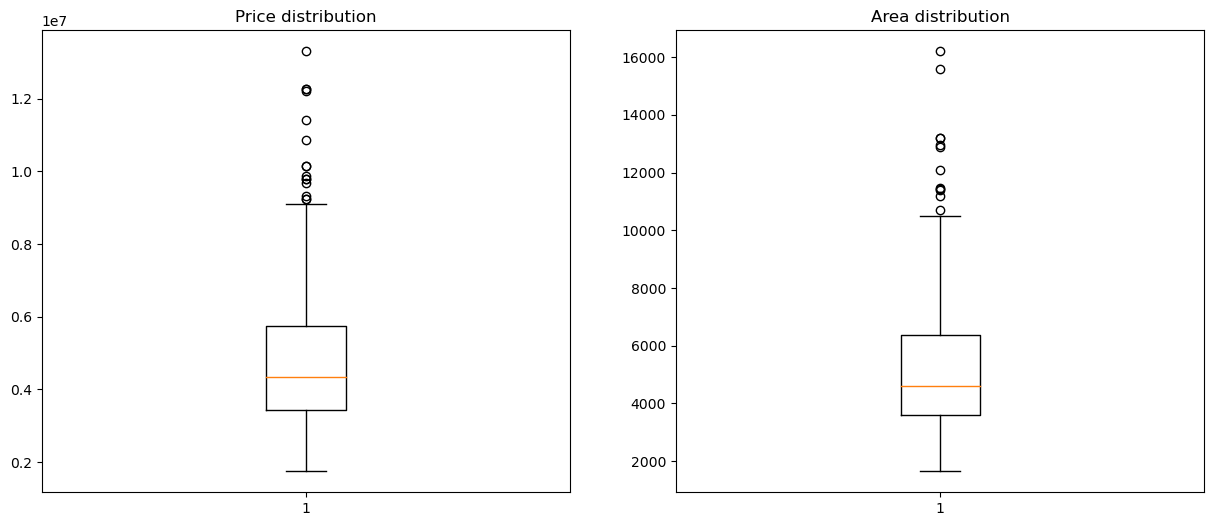

In [33]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.boxplot(data['price'])
plt.title('Price distribution')

plt.subplot(1, 2, 2)
plt.boxplot(data['area'])
plt.title('Area distribution')

plt.show()

## 3.2 Bivariate Analysis

### Scatter plot

<Axes: xlabel='area', ylabel='price'>

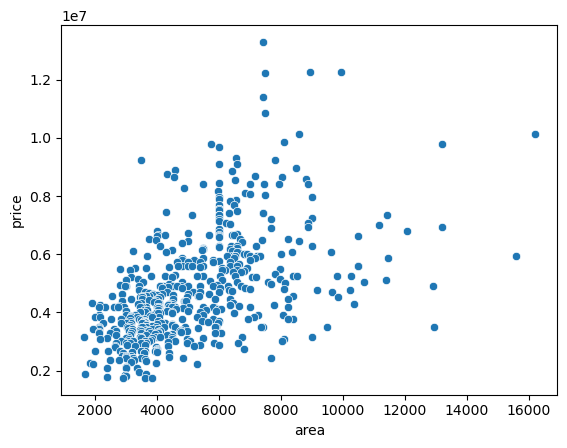

In [38]:
sns.scatterplot(data, x='area', y='price')

### Bar plot

<Axes: xlabel='area', ylabel='price'>

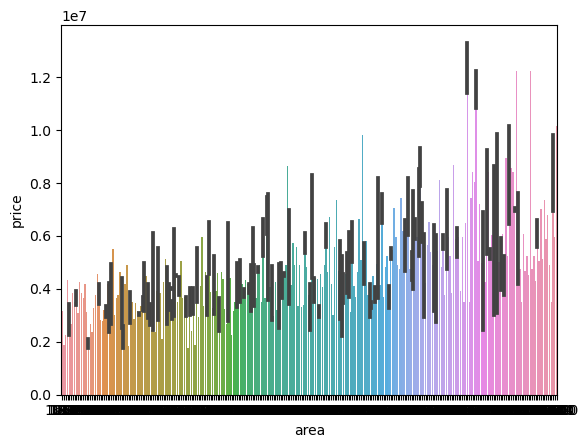

In [40]:
sns.barplot(data, x='area', y='price')

## 3.3 Multi - Variate Analysis

### Heatmap

C:\Users\user\AppData\Local\Temp\ipykernel_1724\3974116545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm=data.corr()


<Axes: >

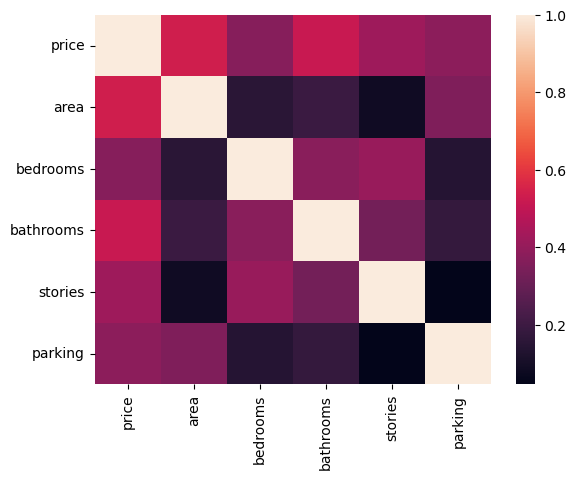

In [42]:
hm=data.corr()
sns.heatmap(hm)

## 4. Perform descriptive statistics on the dataset.

In [43]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 5. Check for Missing values and deal with them.

In [44]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [45]:
data.dropna(axis=0, inplace=True)

## 6. Find the outliers and replace them outliers

In [50]:
# Calculating the IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = (data['price'] < Q1 - 1.5 * IQR) | (data['price'] > Q3 + 1.5 * IQR)

# Replacing outliers with median value
data.loc[outliers, 'price'] = data['price'].median()

In [51]:
# Repeating the same process with 'area'
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)
IQR = Q3 - Q1
outliers = (data['area'] < Q1 - 1.5 * IQR) | (data['area'] > Q3 + 1.5 * IQR)
data.loc[outliers, 'area'] = data['area'].median()

## 7. Check for Categorical columns and perform encoding.

In [55]:
# Checking data types of columns
column_types = data.dtypes

# Filtering categorical columns
categorical_columns = column_types[column_types == 'object'].index

# Printing categorical column names
print(categorical_columns)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')


### Label encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

In [58]:
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

In [59]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,4340000,7420,4,2,3,1,0,0,0,1,2,0
1,4340000,8960,4,4,4,1,0,0,0,1,3,0
2,4340000,9960,3,2,2,1,0,1,0,0,2,1
3,4340000,7500,4,2,2,1,0,1,0,1,3,0
4,4340000,7420,4,1,2,1,1,1,0,1,2,0


## 8. Split the data into dependent and independent variables.

In [71]:
# 'Y' is the dependent variable

y = data['price']

y.head()

0    4340000
1    4340000
2    4340000
3    4340000
4    4340000
Name: price, dtype: int64

In [72]:
# 'X' is the independent variable 

X= data.drop(columns=['price'],axis=1)

X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,0
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,0
4,7420,4,1,2,1,1,1,0,1,2,0


## 9. Scale the independent variables

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_s = scaler.fit_transform(X)

X_s

array([[0.6519774 , 0.6       , 0.33333333, ..., 1.        , 0.66666667,
        0.        ],
       [0.8259887 , 0.6       , 1.        , ..., 1.        , 1.        ,
        0.        ],
       [0.93898305, 0.4       , 0.33333333, ..., 0.        , 0.66666667,
        0.5       ],
       ...,
       [0.22259887, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.14237288, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24858757, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [75]:
X = pd.DataFrame(X_s, columns = X.columns)

X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,0.651977,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,0.0
1,0.825989,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0
2,0.938983,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.5
3,0.661017,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,0.0
4,0.651977,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0


## 10. Split the data into training and testing

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [78]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
542,0.222599,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
496,0.265537,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
484,0.157062,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
507,0.220339,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
252,0.927684,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5


In [79]:
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
239,0.265537,0.4,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.333333,0.0
113,0.900565,0.4,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0
325,0.204520,0.6,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.000000,0.5
66,0.333333,0.2,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.333333,0.0
479,0.227119,0.6,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,1.0


In [82]:
y_train

542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
        ...   
70     6790000
277    4305000
9      4340000
359    3710000
192    5040000
Name: price, Length: 436, dtype: int64

In [83]:
y_test

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
76     6650000
132    5810000
311    4123000
464    3080000
155    5530000
Name: price, Length: 109, dtype: int64

## 11. Build the Model





In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

## 12. Train the Model

In [88]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## 13. Test the Model

In [92]:
y_pred = model.predict(X_test)

y_pred

array([4436880.        , 4813830.        , 4682930.        ,
       4969300.        , 3042923.33333333, 6759655.        ,
       3386635.        , 3826760.        , 2738750.        ,
       6724356.8       , 6117230.        , 3925670.        ,
       4330900.        , 5254130.        , 5166000.        ,
       2402487.5       , 4574080.        , 4725560.        ,
       3563140.        , 4165280.        , 5733490.        ,
       6136235.        , 4584685.        , 2559620.        ,
       6104175.        , 4550770.        , 5418490.        ,
       5227390.        , 4459350.        , 6030290.        ,
       3590510.        , 4090325.16666667, 5076540.        ,
       3178805.        , 3728690.        , 4946900.        ,
       5380480.        , 4102630.        , 3522050.        ,
       3610600.        , 7210701.4       , 6418930.        ,
       5268480.        , 4425960.        , 3408160.        ,
       6472095.        , 4500720.        , 3221872.5       ,
       5314645.        ,

## 14. Measure the performance using Metrics.

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [95]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [96]:
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R-squared (R2) Score: ", r2)

Mean Squared Error (MSE):  854425374107.277
Mean Absolute Error (MAE):  699844.2318042814
R-squared (R2) Score:  0.4763982828121529
